In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
X_train = pd.read_csv("train_X.csv")
Y_train = pd.read_csv("train_Y.csv")
X_test = pd.read_csv("test_X.csv")
Y_test = pd.read_csv("test_Y.csv")

In [77]:
X_train

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,886,2,0,27.0,0,0,13.0000,1
887,887,1,1,19.0,0,0,30.0000,1
888,888,3,1,20.0,1,2,23.4500,1
889,889,1,0,26.0,0,0,30.0000,0


In [78]:
X_train = X_train.drop("Id", axis = 1)
Y_train = Y_train.drop("Id", axis = 1)
X_test = X_test.drop("Id", axis = 1)
Y_test = Y_test.drop("Id", axis = 1)

In [79]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values
print(X_train)

[[ 3.      0.     22.     ...  0.      7.25    1.    ]
 [ 1.      1.     38.     ...  0.     71.2833  0.    ]
 [ 3.      1.     26.     ...  0.      7.925   1.    ]
 ...
 [ 3.      1.     20.     ...  2.     23.45    1.    ]
 [ 1.      0.     26.     ...  0.     30.      0.    ]
 [ 3.      0.     32.     ...  0.      7.75    2.    ]]


In [80]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [81]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (7, 891)
Shape of Y_train :  (1, 891)
Shape of X_test :  (7, 418)
Shape of Y_test :  (1, 418)


In [82]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [83]:
m = X_train.shape[1]
n = X_train.shape[0]

W = np.zeros((n,1))
print(W)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [84]:
W.shape

(7, 1)

In [85]:
def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X)
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
    
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, cost_list

In [86]:
iterations = 100000
learning_rate = 0.0015
W, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  10000 iteration is :  0.49760131653652634
cost after  20000 iteration is :  0.4690200263967867
cost after  30000 iteration is :  0.46018662399440013
cost after  40000 iteration is :  0.45712084771132416
cost after  50000 iteration is :  0.455979497937832
cost after  60000 iteration is :  0.45553582990635266
cost after  70000 iteration is :  0.4553586287007446
cost after  80000 iteration is :  0.455286620696801
cost after  90000 iteration is :  0.45525703033965


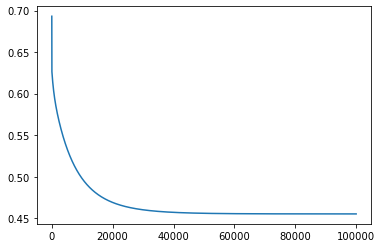

In [87]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [88]:
def accuracy(X, Y, W):
    
    Z = np.dot(W.T, X)
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [89]:
accuracy(X_test, Y_test, W)

Accuracy of the model is :  91.87 %
